In [61]:
#Importing dependencies to chart with MatPlotLib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [62]:
#Importing pandas data manipulation dependencies
import numpy as np
import pandas as pd

In [63]:
#Importing datetime functionality
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [64]:
#Importing Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [65]:
#Set up sqlite engine and use automap to find the base classes
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()

In [66]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [67]:
# We can view all of the classes that automap found (above)

In [68]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [69]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [70]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

#Last data point in the database. 
current_day = dt.date(2017, 8, 23)
#print(current_year)

# Calculate the date one year from the last date in data set.
prev_year = current_day - dt.timedelta(days=365)
#print(prev_year)

# Perform a query to retrieve the data and precipitation scores... 
    #all_resutls[]
    #all_results = session.query(Measurement.date, Measurement.prcp)
    #print(all_results.all())

# For just the year we are looking at... when the data ends with the end point
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
print(results.all())

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [71]:
#TUPLES? vs LIST?

#CODE BELOW .all() is in a different place (can't be both at end and in results)  - YASH RESULTS - LIST Of PRCP ONLY

# In a list  -- .all() at the end vs. in print():
#results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)
    
#yash = [x.prcp for x in results]
#yash

In [72]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
#print(df.to_string(index=False))

# Sort the dataframe by date
df = df.sort_index()
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

<AxesSubplot:title={'center':'Total precipitation per reading for the past year'}, xlabel='date'>

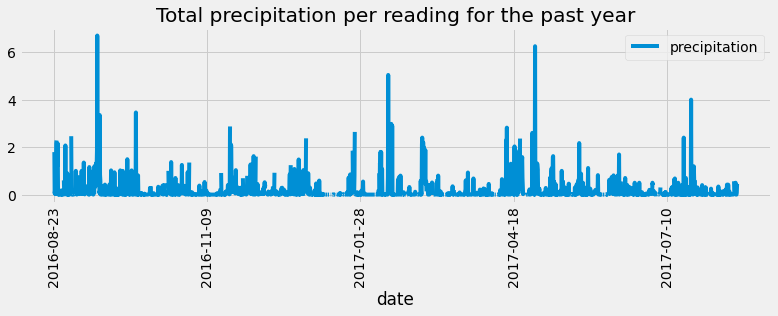

In [75]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot = 90, figsize=(12,3), title = "Total precipitation per reading for the past year")

In [76]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [77]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [78]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [80]:
# Looking at the sqlquery used above
sqlquery = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
print(sqlquery)

SELECT measurement.station AS measurement_station, count(measurement.station) AS count_1 
FROM measurement GROUP BY measurement.station ORDER BY count(measurement.station) DESC


In [81]:
# Using the station id from the ost active station, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature...
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [85]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
t_results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').filter(Measurement.date >= prev_year).all()
print(t_results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

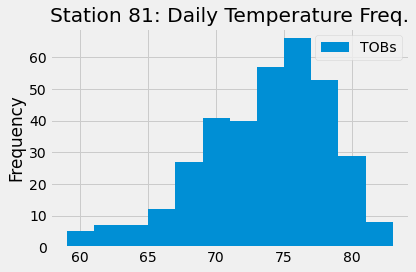

In [133]:
#Put the data into a data frame...
df = pd.DataFrame(t_results, columns=['TOBs'])
#print(df.to_string(index=False))


# Plot the data... (simple frequency... not sorting for months exactly...)
df.plot.hist(bins=12, title="Station 81: Daily Temperature Freq.")
plt.tight_layout()

In [87]:
# BONUS?  (Not acually in the module)
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
calc_temps = df.describe()
print(calc_temps)

#Temps Max-Min = 83-59 = 24... bins make more sense to equal 24 than 12 (above)?? but 12 looks better

             tobs
count  352.000000
mean    73.107955
std      4.733315
min     59.000000
25%     70.000000
50%     74.000000
75%     77.000000
max     83.000000


# Challenge

In [89]:
# Trying some things for my additional challenge options... to make two additional queries of relevant analysis data
# Going back to precipitation instead of temp
p_results = session.query(Measurement.prcp).\
filter(Measurement.station == 'USC00519281').filter(Measurement.date >= prev_year).all()
print(p_results)

[(1.79,), (2.15,), (0.06,), (0.01,), (0.12,), (0.6,), (0.35,), (0.0,), (0.24,), (0.02,), (0.01,), (0.12,), (0.14,), (0.03,), (0.11,), (0.16,), (0.07,), (0.16,), (0.09,), (0.3,), (0.31,), (0.34,), (2.33,), (0.83,), (0.06,), (0.36,), (0.07,), (0.01,), (0.22,), (0.07,), (0.34,), (0.94,), (0.01,), (0.03,), (0.17,), (0.17,), (0.0,), (0.59,), (0.25,), (0.14,), (0.06,), (0.16,), (0.03,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.28,), (0.03,), (0.0,), (0.0,), (0.04,), (0.0,), (0.01,), (0.02,), (0.11,), (0.0,), (0.0,), (0.15,), (0.02,), (0.08,), (0.11,), (0.01,), (0.22,), (0.05,), (0.1,), (0.16,), (0.07,), (0.1,), (0.0,), (0.0,), (0.0,), (0.03,), (0.01,), (0.0,), (0.21,), (0.11,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.24,), (0.01,), (0.0,), (0.11,), (0.39,), (0.11,), (2.05,), (0.25,), (0.3,), (0.08,), (0.06,), (0.17,), (0.0,), (0.09,), (0.05,), (0.37,), (0.35,), (0.77,), (0.04,), (0.22,), (0.0,), (0.12,), (0.07,), (0.31,), (0.02,), (0.0,), (0.0,), (0.04,), (0.92,), (0.14

             PRCP
count  352.000000
mean     0.198949
std      0.419182
min      0.000000
25%      0.000000
50%      0.060000
75%      0.190000
max      2.980000


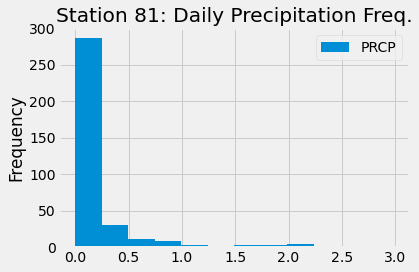

In [138]:
#Put the data into a data frame...
df = pd.DataFrame(p_results, columns=['PRCP'])
#print(df.to_string(index=False))
calc_prcp = df.describe()
print(calc_prcp)

# Plot the data... (12 buckets... frequency of amounts) << not really what I want :(
df.plot.hist(bins=12, title = "Station 81: Daily Precipitation Freq.")
plt.tight_layout()

In [111]:
# I want the amount of rain per day for my selected year for my slected station

station81_1yrprcp = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.station == 'USC00519281').filter(Measurement.date >= prev_year).\
group_by(Measurement.date).order_by(Measurement.date).all()

#station81_1yrprcp

# Save the query results as a Pandas DataFrame and set the index to the date column
s81ap_df = pd.DataFrame(station81_1yrprcp, columns=['date','precipitation'])
s81ap_df.set_index(s81ap_df['date'], inplace=True)
#print(s81ap_df.to_string(index=False))

# Sort the dataframe by date
s81ap_df = s81ap_df.sort_index()
print(s81ap_df.to_string(index=False))

      date  precipitation
2016-08-23           1.79
2016-08-24           2.15
2016-08-25           0.06
2016-08-26           0.01
2016-08-27           0.12
2016-08-28           0.60
2016-08-29           0.35
2016-08-30           0.00
2016-08-31           0.24
2016-09-01           0.02
2016-09-02           0.01
2016-09-03           0.12
2016-09-04           0.14
2016-09-05           0.03
2016-09-06           0.11
2016-09-07           0.16
2016-09-08           0.07
2016-09-09           0.16
2016-09-10           0.09
2016-09-11           0.30
2016-09-12           0.31
2016-09-13           0.34
2016-09-14           2.33
2016-09-15           0.83
2016-09-16           0.06
2016-09-17           0.36
2016-09-18           0.07
2016-09-19           0.01
2016-09-20           0.22
2016-09-21           0.07
2016-09-22           0.34
2016-09-23           0.94
2016-09-24           0.01
2016-09-25           0.03
2016-09-26           0.17
2016-09-27           0.17
2016-09-28           0.00
2016-09-29  

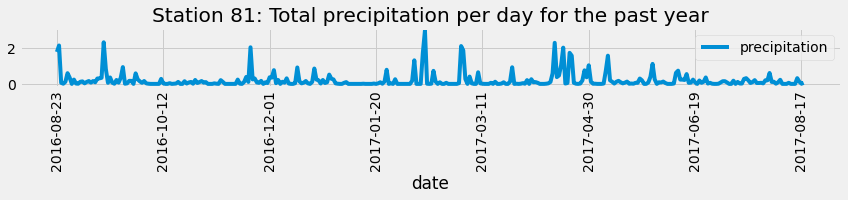

In [117]:
s81ap_df.plot(rot = 90, figsize=(12,3), title = "Station 81: Total precipitation per day for the past year")
plt.tight_layout()

In [135]:
# What are the rain totals for the top station for each month of the year?
# List counts by month??  << OY could never figure this out... :(

session.query(Measurement.station, func.sum(Measurement.prcp)).\
group_by(filter(Measurement.date.MONTH).order_by(filter(Measurement.station == 'USC00519281')).all()

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_16188/2590186344.py, line 5)